In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
import matplotlib
from matplotlib import rc
# rc('font', **{'serif': ['Computer Modern Roman'], 'size':22})
# rc('font', **{'serif': ['Computer Modern Roman'], 'size':22})
rc('font',**{'family':'sans-serif'})

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amsfonts}',
    r'\usepackage{amssymb}']

rc('text', usetex=False)
rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 
rc('axes', labelsize=20)    # fontsize of the x and y labels


from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import shapely.geometry as sgeom
from copy import copy

import matplotlib.pyplot as plt
import cosima_cookbook as cc
import xarray as xr
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cft
import cmocean as cm

import matplotlib.pyplot as plt
from xgcm import Grid

import time
import pylab as pl
from IPython import display

In [3]:
from dask.distributed import Client, progress
c = Client()

In [4]:
c

Client Scheduler: tcp://127.0.0.1:35219 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 48 Memory: 202.48 GB


In [5]:
folder = '/g/data/v45/nc3020/SOsector/'
# folder = '/scratch/v45/nc3020/mom6/archive/testgrid/'
# folder = '/scratch/v45/nc3020/mom6/work/HenkTestRunMercator/'

In [6]:
# First plot KE evolution
FileList = folder + 'output000/ocean_geometry.nc'
dsx_geom = xr.open_mfdataset(FileList, concat_dim='Time', decode_times=False, engine='netcdf4')
print(dsx_geom)

<xarray.Dataset>
Dimensions:  (Time: 1, lath: 608, latq: 608, lonh: 3600, lonq: 3600)
Coordinates:
  * latq     (latq) float64 -69.97 -69.93 -69.9 -69.86 ... -36.16 -36.08 -36.0
  * lonh     (lonh) float64 -279.9 -279.9 -279.8 -279.6 ... 79.75 79.85 79.95
  * lonq     (lonq) float64 -279.9 -279.8 -279.7 -279.6 ... 79.7 79.8 79.9 80.0
  * lath     (lath) float64 -69.98 -69.95 -69.91 -69.88 ... -36.2 -36.12 -36.04
Dimensions without coordinates: Time
Data variables:
    geolatb  (Time, latq, lonq) float64 dask.array<chunksize=(1, 608, 3600), meta=np.ndarray>
    geolonb  (Time, latq, lonq) float64 dask.array<chunksize=(1, 608, 3600), meta=np.ndarray>
    geolat   (Time, lath, lonh) float64 dask.array<chunksize=(1, 608, 3600), meta=np.ndarray>
    geolon   (Time, lath, lonh) float64 dask.array<chunksize=(1, 608, 3600), meta=np.ndarray>
    D        (Time, lath, lonh) float64 dask.array<chunksize=(1, 608, 3600), meta=np.ndarray>
    f        (Time, latq, lonq) float64 dask.array<chunksize=

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the 

In [7]:
# First plot KE evolution
FileList = folder + 'output*/ocean.stats.nc'
dsx_stats = xr.open_mfdataset(FileList, concat_dim='Time', decode_times=False, engine='netcdf4')

dsx_stats.coords['Time'] = dsx_stats.coords['Time']/(365) # convert time units to years
print(dsx_stats)

m, ninterfaces = dsx_stats.H0.shape
nlayers = ninterfaces - 1

<xarray.Dataset>
Dimensions:        (Interface: 5, Layer: 4, Time: 7668)
Coordinates:
  * Interface      (Interface) float64 1.027e+03 1.027e+03 ... 1.028e+03
  * Layer          (Layer) float64 1.027e+03 1.027e+03 1.028e+03 1.028e+03
  * Time           (Time) float64 0.0 0.002743 0.005486 ... 20.99 21.0 21.0
Data variables:
    Ntrunc         (Time) float64 dask.array<chunksize=(3651,), meta=np.ndarray>
    En             (Time) float64 dask.array<chunksize=(3651,), meta=np.ndarray>
    APE            (Time, Interface) float64 dask.array<chunksize=(3651, 5), meta=np.ndarray>
    KE             (Time, Layer) float64 dask.array<chunksize=(3651, 4), meta=np.ndarray>
    H0             (Time, Interface) float64 dask.array<chunksize=(3651, 5), meta=np.ndarray>
    Mass_lay       (Time, Layer) float64 dask.array<chunksize=(3651, 4), meta=np.ndarray>
    Mass           (Time) float64 dask.array<chunksize=(3651,), meta=np.ndarray>
    Mass_chg       (Time) float64 dask.array<chunksize=(3651,),

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
KE = dsx_stats.KE.load()
APE = dsx_stats.APE.load()

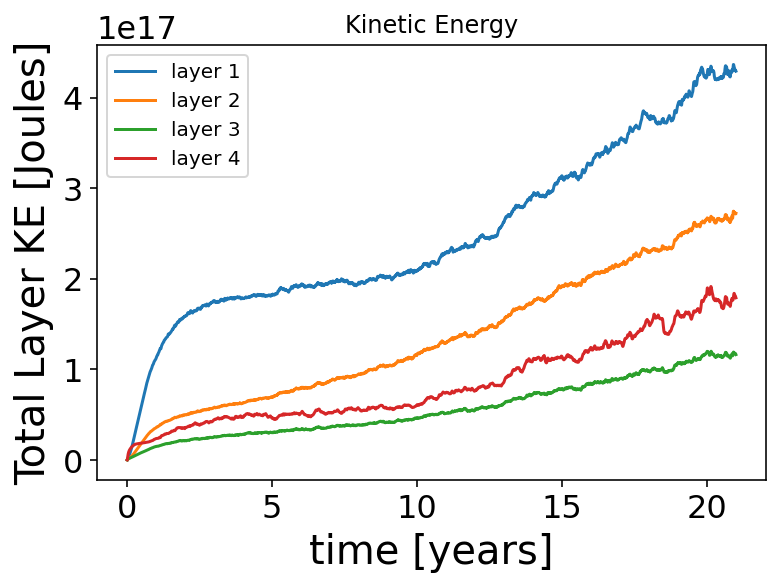

In [9]:
for layer in range(nlayers):
    layernumber = layer+1
    KE.isel(Layer=layer).plot(label='layer %i' %layernumber)
plt.title('Kinetic Energy')
plt.xlabel('time [years]')

plt.legend()
plt.show()

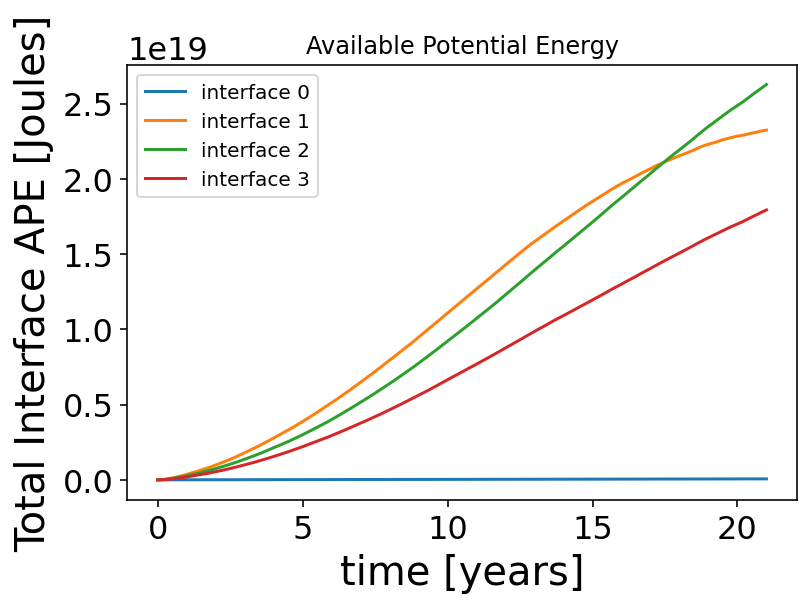

In [10]:
for interface in range(0, ninterfaces-1):
    interfacenumber = interface
    APE.isel(Interface=interface).plot(label='interface %i' %interfacenumber)
plt.legend()
plt.title('Available Potential Energy')
plt.xlabel('time [years]');

<xarray.DataArray 'Time' ()>
array(21.)


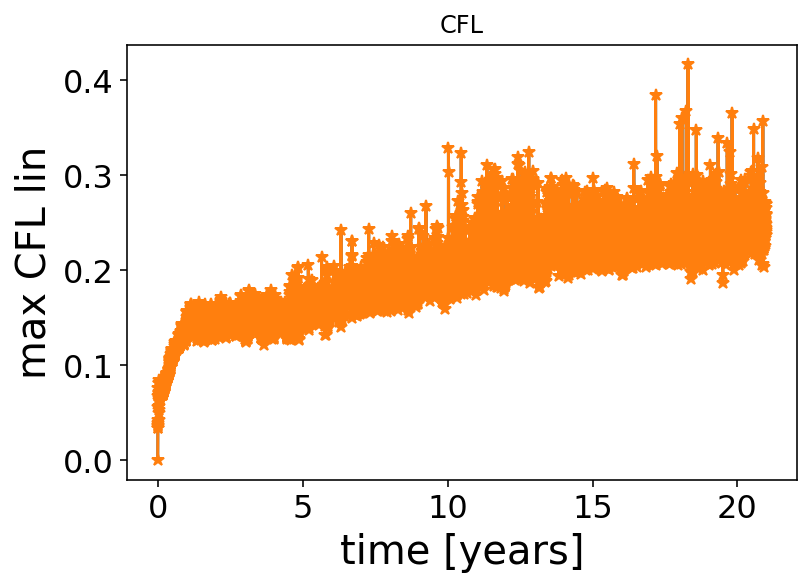

In [11]:
dsx_stats.max_CFL_trans.plot()

dsx_stats.max_CFL_lin.plot(marker="*")
plt.title('CFL')
plt.xlabel('time [years]')
plt.ylabel('max CFL lin')
print(np.max(dsx_stats.coords['Time']));


In [12]:
# Now plot mean interface height
FileList = folder + 'output*/prog.nc'
dsx = xr.open_mfdataset(FileList, concat_dim='Time', decode_times=False, engine='netcdf4', chunks={'Time':1})
dsx.coords['Time'] = dsx.coords['Time']/(365)
dsx.Time.attrs['units'] = 'years'
print(dsx)



<xarray.Dataset>
Dimensions:  (Time: 766, xh: 3600, xq: 3600, yh: 608, yq: 608, zi: 5, zl: 4)
Coordinates:
  * zl       (zl) float64 1.027e+03 1.027e+03 1.028e+03 1.028e+03
  * yh       (yh) float64 -69.98 -69.95 -69.91 -69.88 ... -36.2 -36.12 -36.04
  * xq       (xq) float64 -279.9 -279.8 -279.7 -279.6 ... 79.7 79.8 79.9 80.0
  * xh       (xh) float64 -279.9 -279.9 -279.8 -279.6 ... 79.75 79.85 79.95
  * zi       (zi) float64 1.027e+03 1.027e+03 1.028e+03 1.028e+03 1.028e+03
  * yq       (yq) float64 -69.97 -69.93 -69.9 -69.86 ... -36.16 -36.08 -36.0
  * Time     (Time) float64 0.0274 0.05479 0.08219 0.1096 ... 20.95 20.97 21.0
Data variables:
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(1, 4, 608, 3600), meta=np.ndarray>
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(1, 4, 608, 3600), meta=np.ndarray>
    h        (Time, zl, yh, xh) float32 dask.array<chunksize=(1, 4, 608, 3600), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunk

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.01/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: Also `open_mfdataset` will no longer accept a `concat_dim` argument.
To get equivalent behaviour from now on please use the new
`combine_nested` function instead (or the `combine='nested'` option to
`open_mfdataset`).The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the 

In [13]:
dsx.coords['xh'].attrs.update(axis='X')
dsx.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
dsx.coords['yh'].attrs.update(axis='Y')
dsx.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)

g = Grid(dsx, periodic=['X'])

g

<xgcm.Grid>
X Axis (periodic):
  * center   xh --> right
  * right    xq --> center
Y Axis (not periodic):
  * center   yh --> right
  * right    yq --> center

In [14]:
dsx_geom.coords['lonh'].attrs.update(axis='X')
dsx_geom.coords['lonq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
dsx_geom.coords['lath'].attrs.update(axis='Y')
dsx_geom.coords['latq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
ggeom = Grid(dsx_geom, periodic=['X'])

f = ggeom.interp(dsx_geom.f.mean(dim='Time'), 'X')
f = ggeom.interp(f, 'Y', boundary='extend')
f = f.rename({'lonh': 'xh'})
f = f.rename({'lath': 'yh'})
f = f.rename('f')
f.attrs['units'] = 's-1'
f.attrs['long_name'] = 'Coriolis parameter'
f

<xarray.DataArray 'f' (yh: 608, xh: 3600)>
dask.array<mul, shape=(608, 3600), dtype=float64, chunksize=(607, 3599), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -69.98 -69.95 -69.91 -69.88 ... -36.2 -36.12 -36.04
  * xh       (xh) float64 -279.9 -279.9 -279.8 -279.6 ... 79.75 79.85 79.95
Attributes:
    units:      s-1
    long_name:  Coriolis parameter

In [15]:
u = g.interp(dsx.u, 'X')
v = g.interp(dsx.v, 'Y', boundary='extend')

# zeta = v.differentiate('xh') - u.differentiate('yh')
# uyy = (u.differentiate('yh')).differentiate('yh')

# plt.figure()
# zeta.isel(Time=-1, zl=0).plot()

# plt.figure()
# uyy.isel(Time=-1, zl=0).plot()

# plt.figure()
# dsx.h.isel(Time=-1, zl=0).plot()
# dsx.h.isel(Time=-1, zl=0).plot.contour(levels=(3., ), colors="salmon")


# plt.figure()
# dsx.h.isel(Time=-1, zl=1).plot()
# dsx.h.isel(Time=-1, zl=1).plot.contour(levels=(3., ), colors="salmon")


# plt.figure()
# np.sqrt(u**2+v**2).isel(Time=-1, zl=1).plot()
# dsx.h.isel(Time=-1, zl=0).plot.contour(levels=(30., ), colors="salmon")

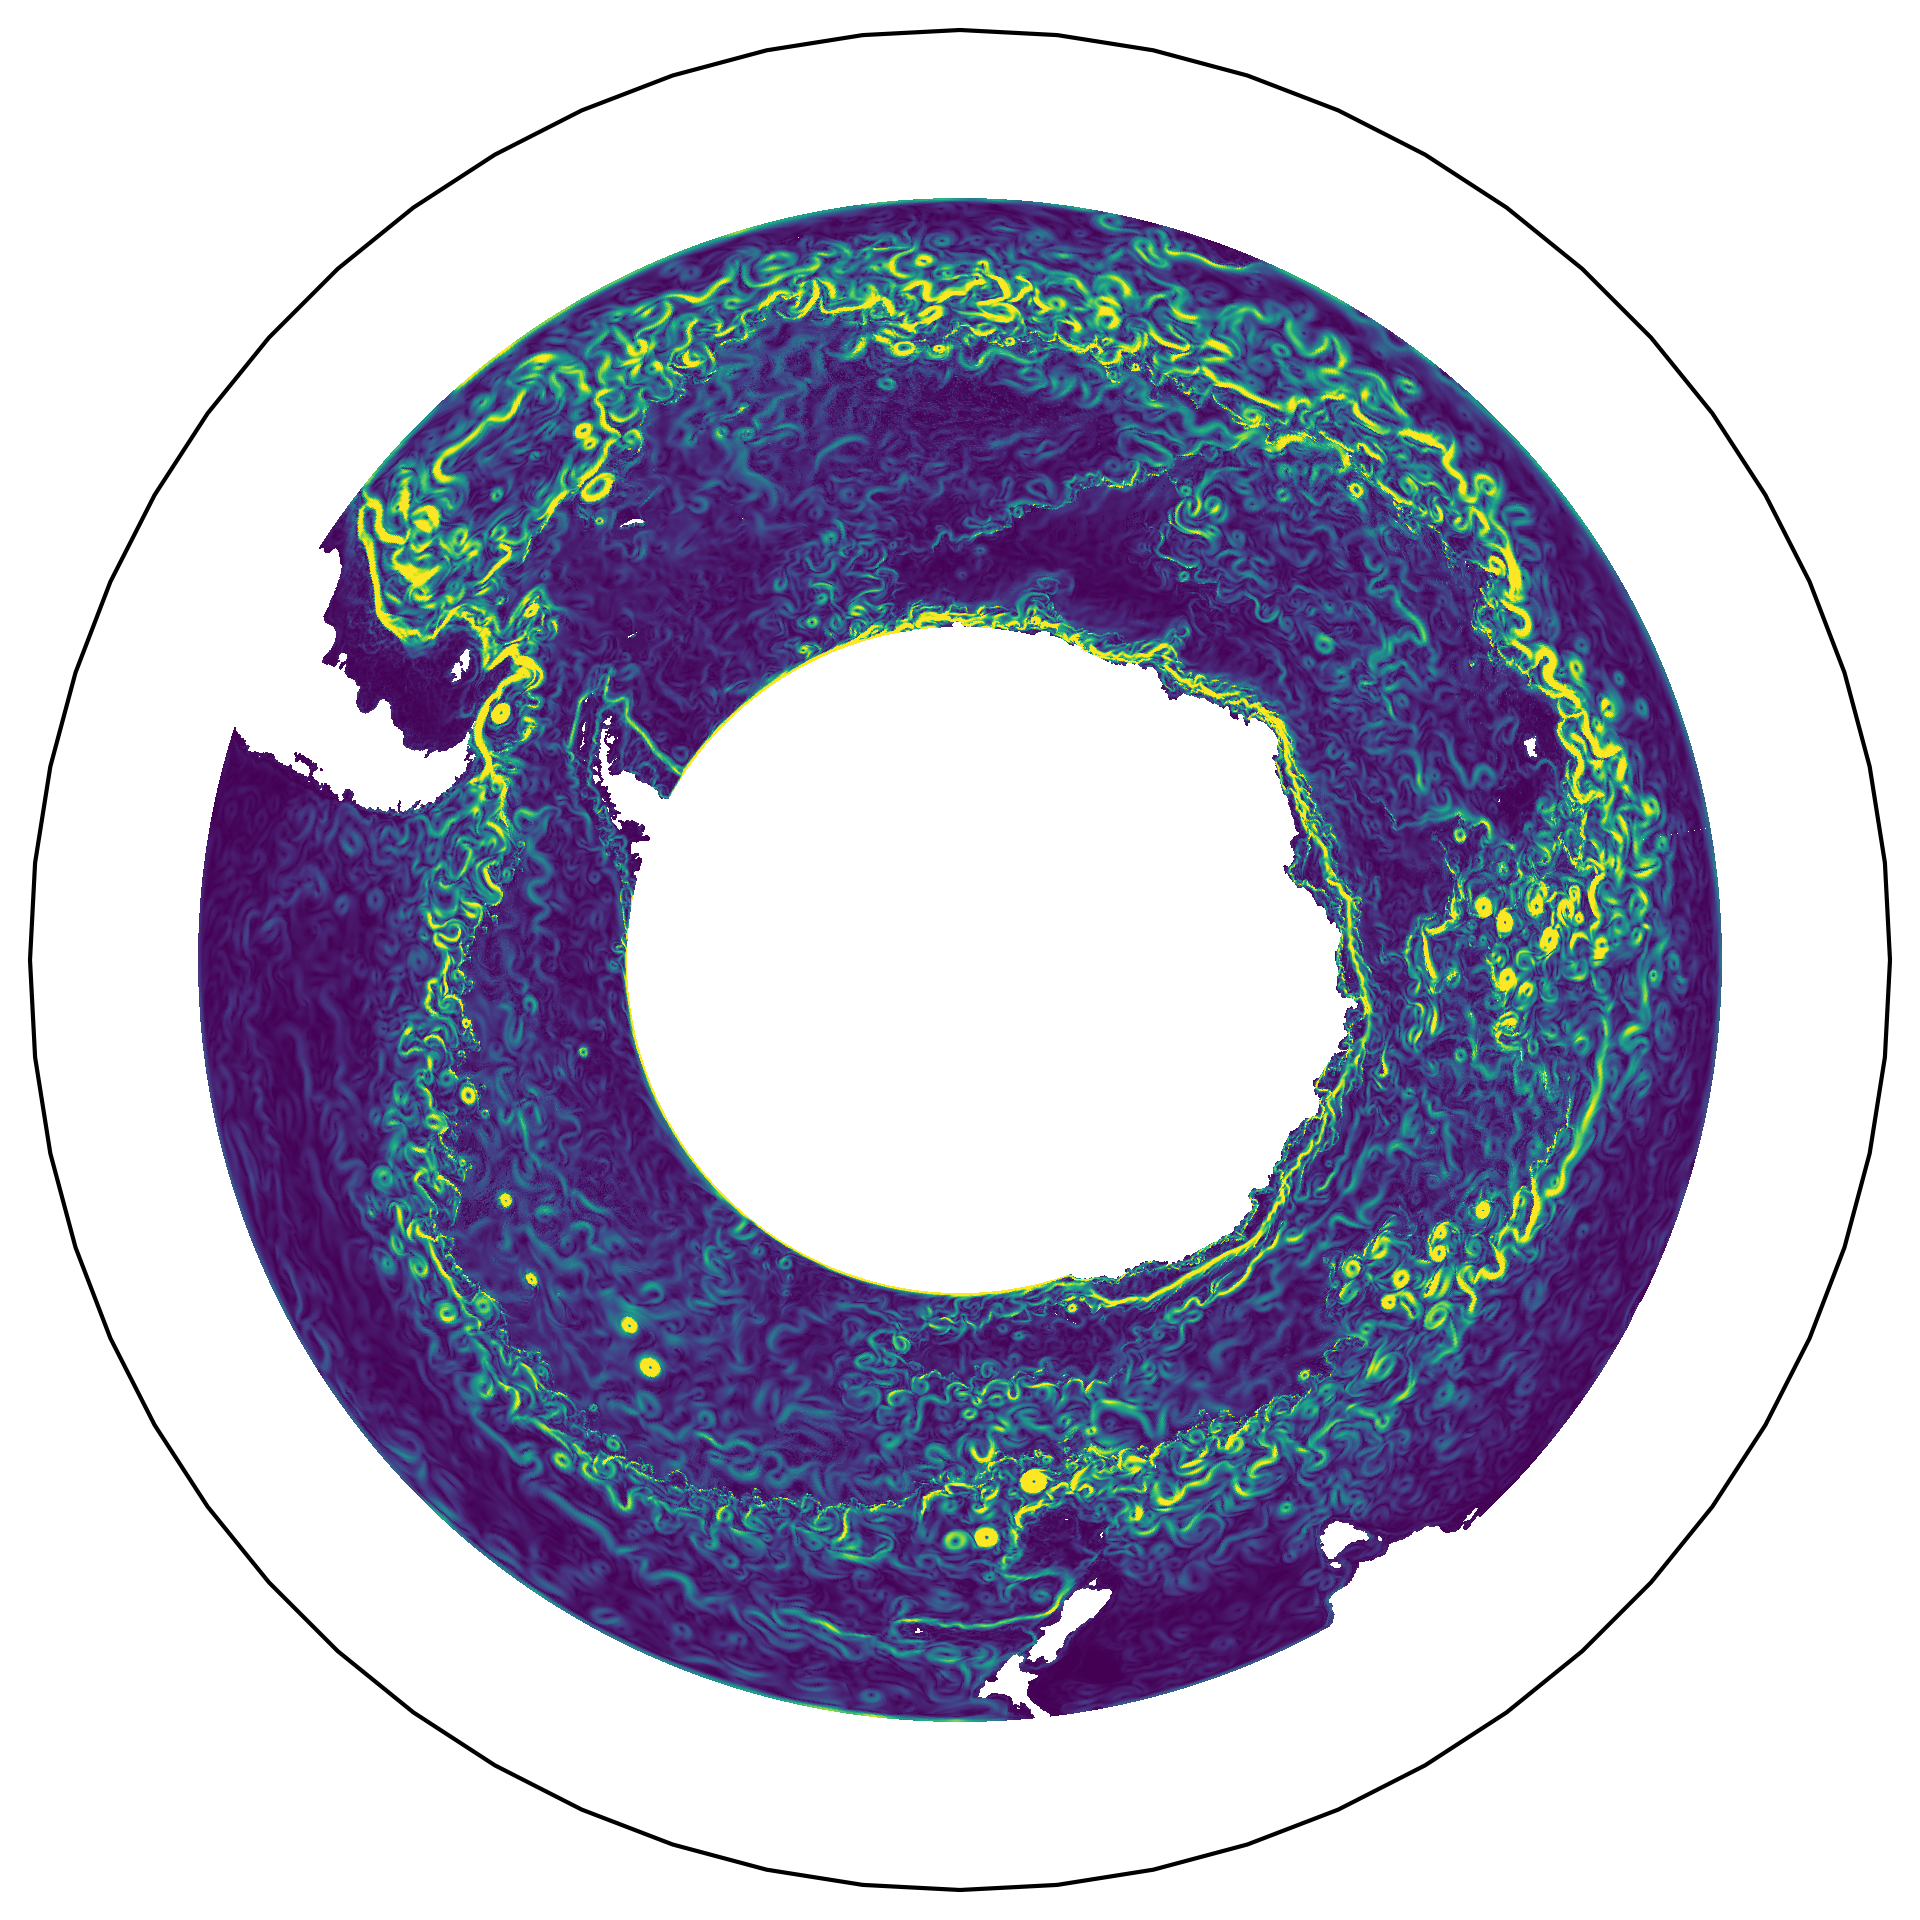

In [16]:
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{amsmath}',
    r'\usepackage{amsfonts}',
    r'\usepackage{amssymb}']

rc('text', usetex=False)
rc('xtick', labelsize=16) 
rc('ytick', labelsize=16) 
rc('axes', labelsize=20)    # fontsize of the x and y labels

# projection = ccrs.Robinson(central_longitude=165.0)
# projection = ccrs.Mollweide(central_longitude=160)
projection = ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0, globe=None)



lon, lat = np.meshgrid(dsx.xh.values, dsx.yh.values+1)
maxspeed = 0.5

fig = plt.figure(figsize=(8, 10), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)

axisextent = [145, 220, -45, -10]    # EAC



u = g.interp(dsx.u, 'X')
v = g.interp(dsx.v, 'Y', boundary='extend')
speed = np.sqrt(u.isel(Time=-1, zl=0)**2 + v.isel(Time=-1, zl=0)**2)

# ax.set_extent(axisextent)
# ax.coastlines(resolution='50m')
# ax.add_feature(cft.LAND)

ax.set_global()
speedplot = ax.pcolormesh(lon, lat, speed, #cmap=cm.cm.thermal, 
               vmax=maxspeed, transform=ccrs.PlateCarree(), rasterized=True)
# ax.set_title(title, fontsize=fs, usetex=True)

# *must* call draw in order to get the axis boundary used to add ticks:
fig.canvas.draw()

# # Define gridline locations and draw the lines using cartopy's built-in gridliner:
# xticks = [-45, -30, -15, 0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 240, 255, 270]
# yticks = [-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90]
# ax.gridlines(xlocs=xticks, ylocs=yticks)
# plt.tight_layout()
# # plt.savefig('snapshot_testgrid.png',  bbox_inches='tight')

In [17]:
e = dsx.e
emean = e.sel(Time=slice(15, 21)).mean(dim='Time').mean(dim='xh').load()

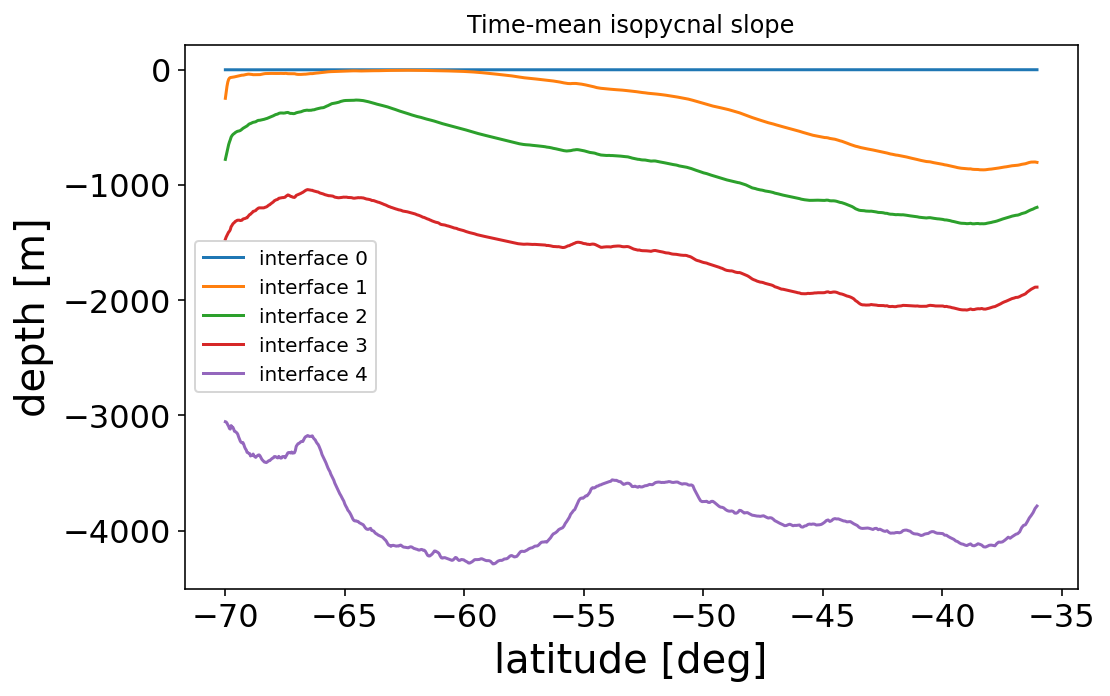

In [20]:
plt.figure(figsize=(8, 5))
for interface in range(0, ninterfaces):
    interfacenumber = interface
    emean.isel(zi=interface).plot(label='interface %i' %interfacenumber)
plt.legend()
plt.title('Time-mean isopycnal slope')
plt.xlabel('latitude [deg]');
plt.ylabel('depth [m]');